# random walk

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import statsmodels.tsa.stattools as sts # adf test
import statsmodels.graphics.tsaplots as sgt # plot acf

before starting with a dataset, let's simulate a random walk, this will help us understand what it is

In [2]:
np.random.seed(42)

# generate a thousand random numbers 
steps = np.random.standard_normal(1000)

# first value of the series as 0
steps[0] = 0

# calculate the cumulative sum of errors 
# for each timestep in the simulated process
random_walk = np.cumsum(steps)

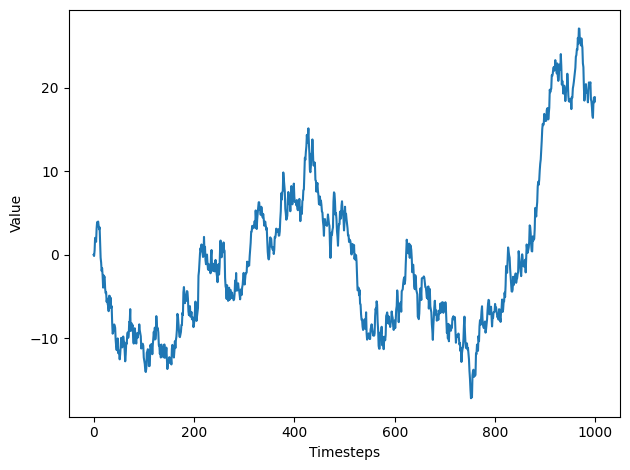

In [3]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [4]:
adf_result = sts.adfuller(random_walk)

In [5]:
print(f'adf statistic {adf_result[0]}')
print(f'p-value {adf_result[1]}')

adf statistic -0.9659524876918759
p-value 0.7654789696692579


the ad statisitc is not a large negative number and p calue is greater than 0.05, therefore our time series is not stationary

The statsmodels library conveniently has a function to quickly plot the ACF.

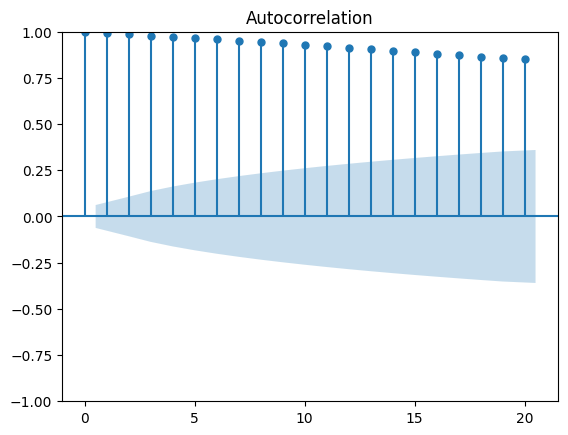

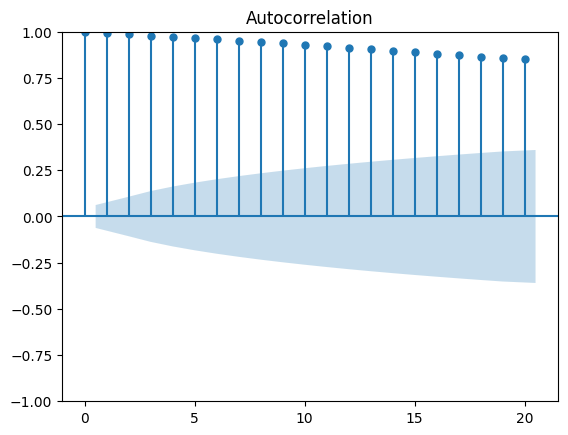

In [6]:
sgt.plot_acf(random_walk, lags = 20)

Because our random walk is not stationary, we need to apply a transformation to make it stationary in order to retrieve useful information from the ACF plot

### making our random walk stationary

we will use differencing, applying this transformation will make it stationary. Let's keep in mind that we will loose one data point when we do this, since the first element can not be differenced with anything

In [7]:
# with n = 1 we set the order of the differencing
diff_random_walk = np.diff(random_walk, n=1)

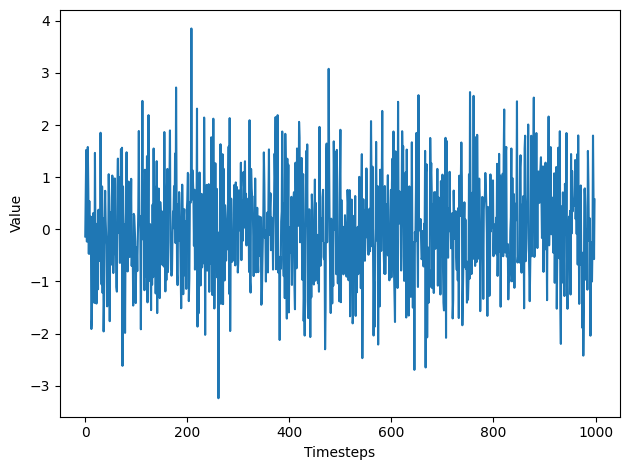

In [8]:
fig, ax = plt.subplots()

ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

we have removed the trend from our dataset, will test for stationary again:

In [9]:
adf_result = sts.adfuller(diff_random_walk)
print(f'adf statistic {adf_result[0]}')
print(f'p-value {adf_result[1]}')

adf statistic -31.7893108575606
p-value 0.0


From the book:
> This time the ADF statistic is a large negative number, and the p-value is less than 0.05. Therefore, we reject the null hypothesis, and we can say that this process has no unit root and is thus stationary.

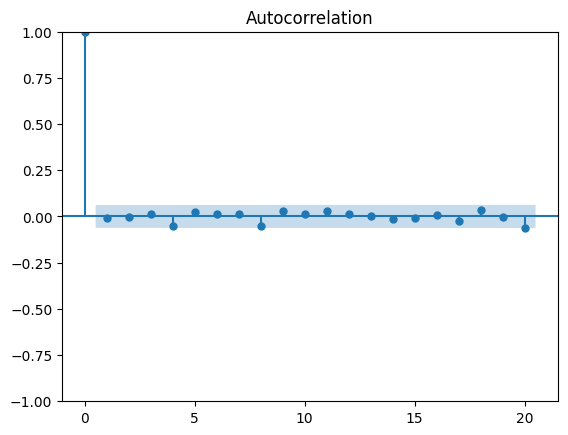

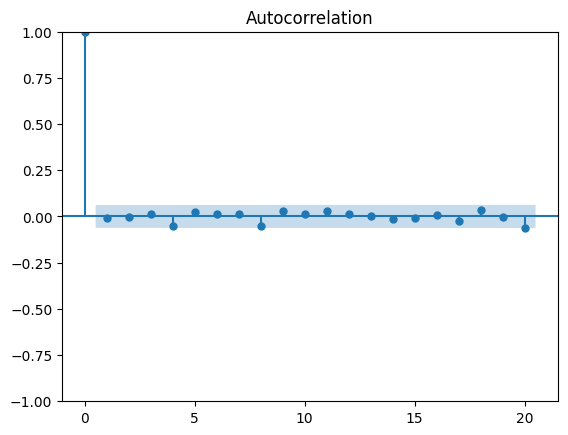

In [10]:
sgt.plot_acf(diff_random_walk, lags = 20)

there is no significant autocorrelation coeficients after lag 0. This means that the process is completely random. Each value is a random step away from the previous one

## let's try with GOOGL stock (27/04/2020 - 27/04/2021)

In [12]:
df = pd.read_csv('googl.csv')

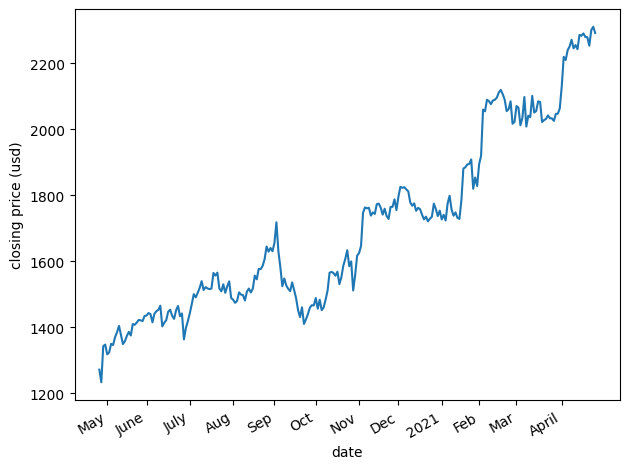

In [17]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('date')
ax.set_ylabel('closing price (usd)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 
        'Dec', 2021, 'Feb', 'Mar', 'April']
)
fig.autofmt_xdate()
plt.tight_layout()

In [19]:
googl_adf = sts.adfuller(df['Close'])
print(f'adf statistic {googl_adf[0]}')
print(f'p-value {googl_adf[1]}')

adf statistic 0.16025048664771477
p-value 0.9699419435913058


not large enought negative number, and p-value bigger than 0.05 so definitely not stationary

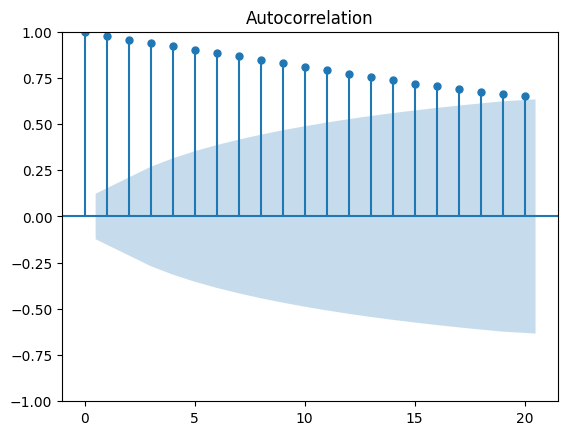

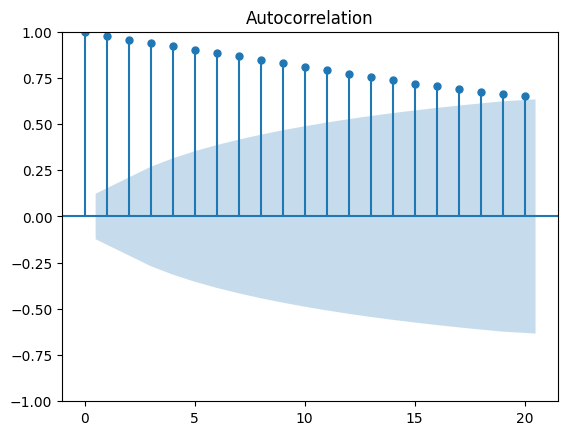

In [22]:
sgt.plot_acf(df['Close'], lags = 20)

let's make the transformation to make it stationary

In [23]:
diff_googl = np.diff(df['Close'], n = 1)

In [24]:
diff_googl_adf = sts.adfuller(diff_googl)
print(f'adf statistic {diff_googl_adf[0]}')
print(f'p-value {diff_googl_adf[1]}')

adf statistic -5.303439704295217
p-value 5.386530961454999e-06


so the p-value is less than -0.05, so now it is stationary, let's plot acf to see how it looks.

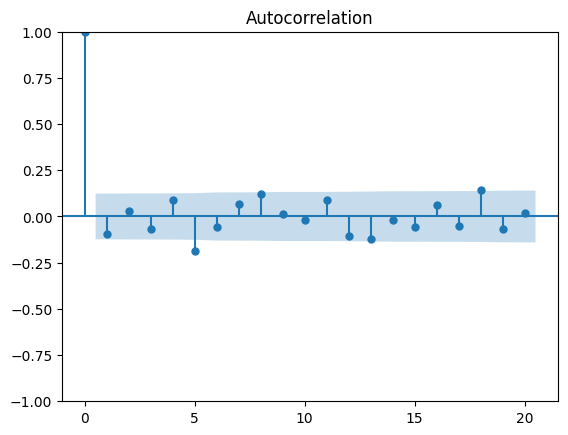

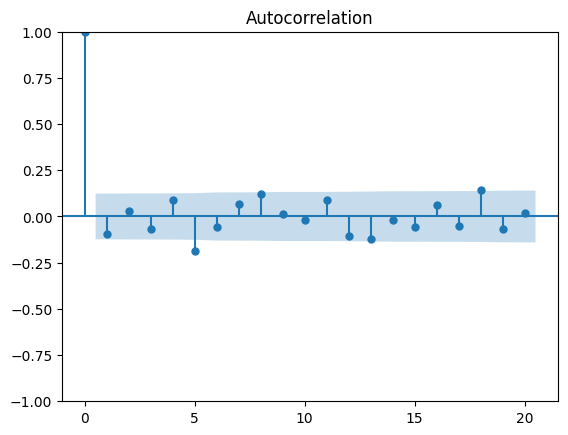

In [30]:
sgt.plot_acf(diff_googl, lags = 20)

## forecasting a random walk (spoiler you can't)

we've established that we have a random walk, so the only forecasting methods we have are pretty poor. We can take the naive ones we used in the baseline, like taking the historical mean, or the last known value. The book does this but I wont do it because it is not worth the trouble.

nevertheless, there is one method that the book mentions here that we have not covered it, so I'll implement this last one:

### the drift method